**Importing libraries and the train and test datasets**

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

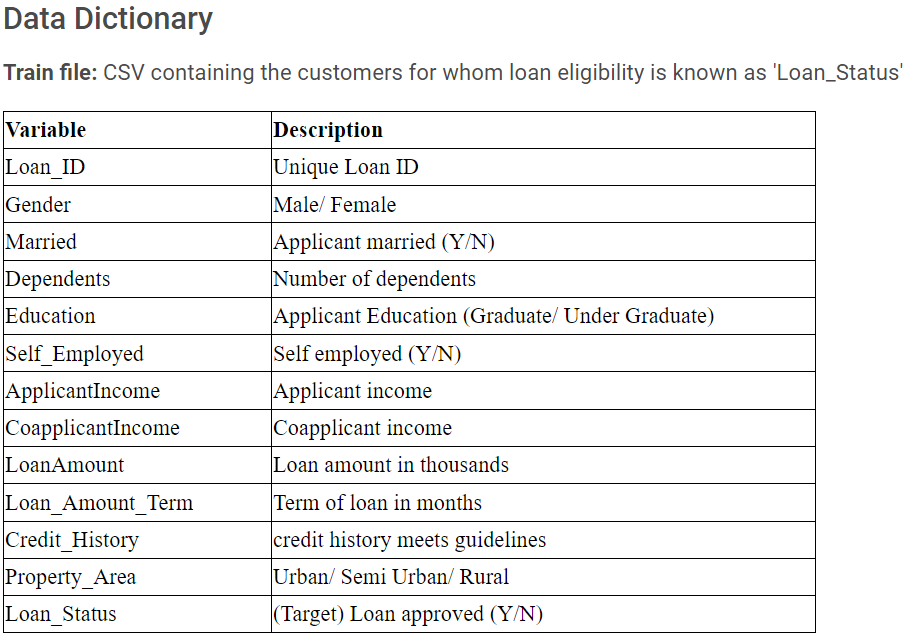

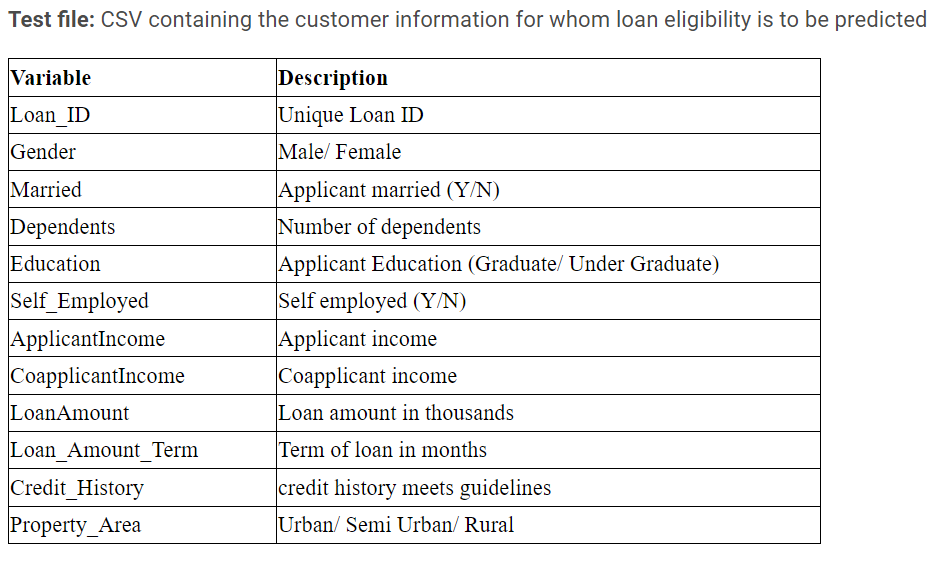

In [2]:
test = pd.read_csv('/content/drive/MyDrive/Colab files/test_lAUu6dG.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab files/train_ctrUa4K.csv')
test_copy = test.copy()
train_copy = train.copy()

In [3]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
test.shape

(367, 12)

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.shape

(614, 13)

In [7]:
df = train_copy.append(test_copy) # Concatenated the test and train data
df_copy = df.copy()

In [8]:
df_copy.shape

(981, 13)

In [9]:
df_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [11]:
df_copy.drop(['Loan_ID'], axis = 1, inplace = True)  #Droped the Loan_ID column

**Created list of categorical and numerical data**

In [12]:
df_categorical = [col for col in df_copy.columns if df_copy[col].dtypes == 'O'] 
df_categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [13]:
len(df_categorical)

7

In [14]:
df_numerical = [col for col in df_copy.columns if df_copy[col].dtypes != 'O']
df_numerical

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

**Handling null values**

In [15]:
df_copy.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

The 367 null values which we can see in the "Loan_Status" column is solely from test data set so we will not bother about it as at last of feature engineering we will seperate out the test dataset.

In [16]:
missing_df = df_copy.isnull().sum()
missing_df = missing_df[df_copy.isnull().sum()>0]
percent_missing = missing_df * 100 / df.shape[0]
pd.concat([missing_df, percent_missing], axis=1,keys=['Missing Values', 'Percentage']).sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
Loan_Status,367,37.410805
Credit_History,79,8.053007
Self_Employed,55,5.606524
LoanAmount,27,2.752294
Dependents,25,2.548420
Gender,24,2.446483
Loan_Amount_Term,20,2.038736
Married,3,0.305810


Replacing null values with mode and mean as per the data


In [17]:
df_copy['Credit_History'].fillna(df_copy['Credit_History'].mode()[0], inplace = True)
df_copy['Self_Employed'].fillna(df_copy['Self_Employed'].mode()[0], inplace = True)
df_copy['LoanAmount'].fillna(df_copy['LoanAmount'].mean(), inplace = True)
df_copy['Dependents'].fillna(df_copy['Dependents'].mode()[0], inplace = True)
df_copy['Loan_Amount_Term'].fillna(df_copy['Loan_Amount_Term'].mean(), inplace = True)
df_copy['Gender'].fillna(df_copy['Gender'].mode()[0], inplace = True)
df_copy['Married'].fillna(df_copy['Married'].mode()[0], inplace = True)

In [18]:
df_copy.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

**Removing Outliers**

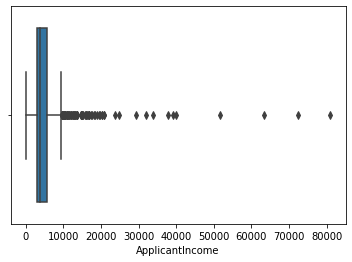

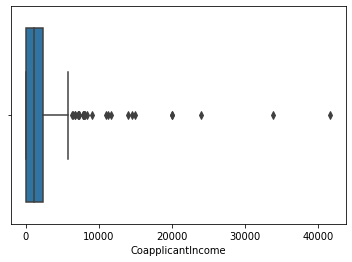

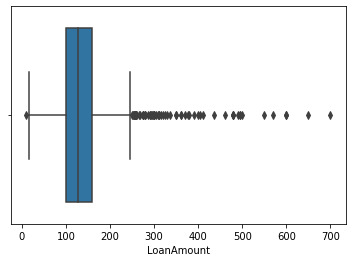

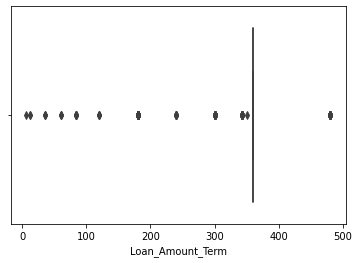

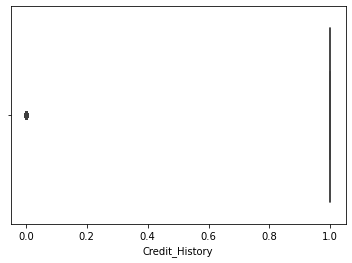

In [19]:
for col in df_numerical: 
  plt.figure(figsize = (6,4))
  sns.boxplot(data = df_copy, x = col)

In [20]:
def remoutl(train,col):   #Fucntion for removing the outliers
 percentile25 = train[col].quantile(0.25)
 percentile75 = train[col].quantile(0.75)
 print(percentile25,percentile75)
 iqr=percentile75-percentile25
 upper_limit = percentile75 + 1.5 * iqr
 lower_limit = percentile25 - 1.5 * iqr
 
 train[col] = np.where(train[col] > upper_limit, upper_limit, np.where(train[col] < lower_limit, lower_limit, train[col]))

In [21]:
for col in df_numerical:
  remoutl(df_copy, col)

2875.0 5516.0
0.0 2365.0
101.0 160.0
360.0 360.0
1.0 1.0


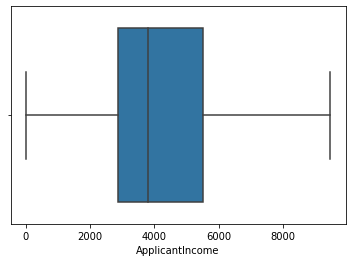

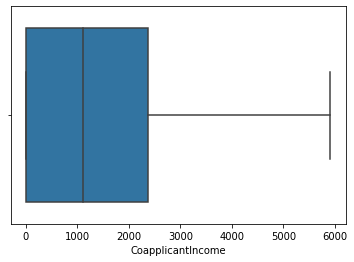

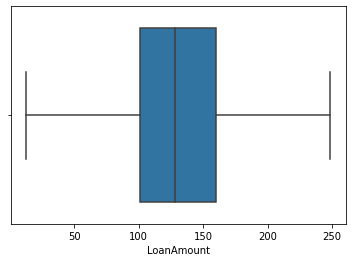

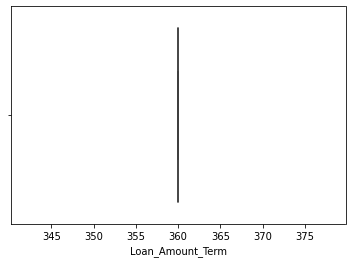

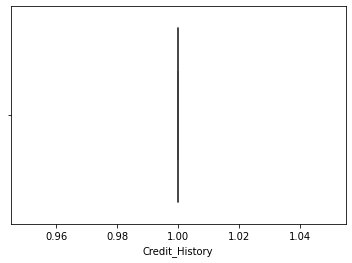

In [22]:
for col in df_numerical: 
  plt.figure(figsize = (6,4))
  sns.boxplot(data = df_copy, x = col)

Hence, all outliers are removed now.

**One-Hot Encoding for the categorical variables**

In [23]:
df_categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [24]:
df_copy['Gender'] = df_copy['Gender'].map({'Male': 0, 'Female': 1})
df_copy['Married'] = df_copy['Married'].map({'No': 0, 'Yes': 1})
df_copy['Dependents'] = df_copy['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df_copy['Education'] = df_copy['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df_copy['Self_Employed'] = df_copy['Self_Employed'].map({'No': 0, 'Yes': 1})
df_copy['Property_Area'] = df_copy['Property_Area'].map({'Urban': 0, 'Rural': 1, 'Semiurban': 2})
df_copy['Loan_Status'] = df_copy['Loan_Status'].map({'N': 0, 'Y': 1})

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int64  
 1   Married            981 non-null    int64  
 2   Dependents         981 non-null    int64  
 3   Education          981 non-null    int64  
 4   Self_Employed      981 non-null    int64  
 5   ApplicantIncome    981 non-null    float64
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int64  
 11  Loan_Status        614 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 99.6 KB


**Correlation Matrix**


>Checking for the important columns and removing those which have less correlation to the data.





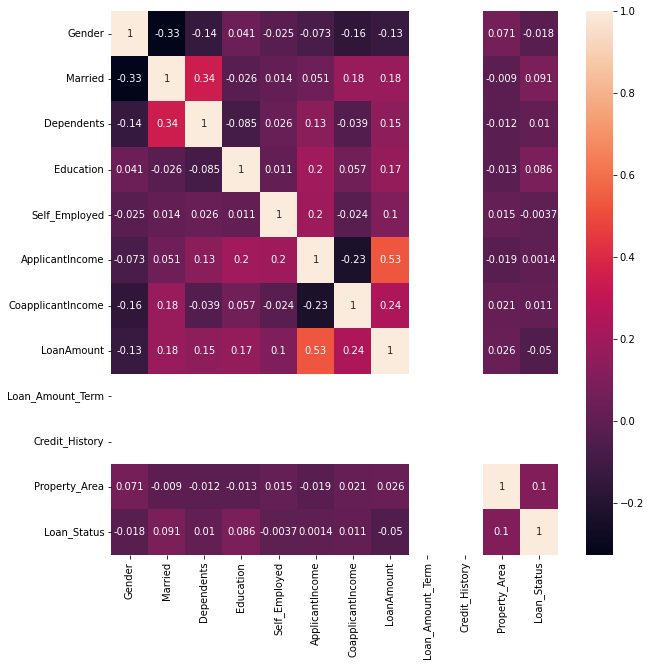

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_copy.corr(),ax=ax,annot=True) #correlation matrix for just visualisation purpose

In [27]:
def correlation(dataset,threshold):  #Function to check the correlation
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i,j])>threshold):
                # Below codes are written to remove that column from the pair which has less correlation with the target variable
                if (abs(corr_matrix.iloc[i]['Loan_Status'])>abs(corr_matrix.iloc[j]['Loan_Status'])):
                    colname = corr_matrix.columns[j]
                    col_corr.add(colname)
                else:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
    return col_corr

In [28]:
corr_features = correlation(df_copy,0.8)

In [29]:
corr_features

set()

**Seperating the test and train datasets**

In [30]:
df_train = df_copy.iloc[0:614]

In [31]:
df_train.shape

(614, 12)

In [32]:
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 62.4 KB


In [34]:
df_test = df_copy.iloc[614:]

In [35]:
df_test.shape

(367, 12)

In [36]:
df_test.drop(['Loan_Status'], axis = 1, inplace = True) #Dropped the Loan_Status column from the test dataset as it was not the part of it initially.

In [37]:
df_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    float64
 6   CoapplicantIncome  367 non-null    float64
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 34.4 KB


**Splitting the train dataset into test and train set**

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Loan_Status', axis=1), df_train[['Loan_Status']], test_size=0.25, random_state=3)

**Handling Imbalanced dataset**

In [40]:
# from imblearn.combine import SMOTETomek
# smk = SMOTETomek(random_state=42)
# X_res_train,y_res_train = smk.fit_resample(X_train,y_train)
# X_res_test, y_res_test = smk.fit_resample(X_test, y_test)

**Standardization**

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# # We need to fit the scaler to our data before transformation (Always remember that we never standardise or normalise target variable)
X_train.loc[:,X_train.columns ] = scaler.fit_transform(X_train.loc[:, X_train.columns])
X_test.loc[:,X_test.columns ] = scaler.fit_transform(X_test.loc[:, X_test.columns])

**Model Building**

In [42]:
X_res_train = X_train
y_res_train = y_train
X_res_test = X_test
y_res_test = y_test

In [43]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_res_train, y_res_train)
y_pred1 = reg.predict(X_res_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_res_test, y_pred1)

0.7467532467532467

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_res_train, y_res_train)
y_pred2 = rfc.predict(X_res_test)
accuracy_score(y_res_test, y_pred2)

0.6493506493506493

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_res_train, y_res_train)
y_pred3 = dtc.predict(X_res_test)
accuracy_score(y_res_test, y_pred3)

0.5909090909090909

In [47]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_res_train, y_res_train)
y_pred4 = reg.predict(X_res_test)
accuracy_score(y_res_test, y_pred4)

0.7467532467532467

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_res_train, y_res_train)
y_pred5 = rfc.predict(X_res_test)
accuracy_score(y_res_test, y_pred5)

0.6688311688311688

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_res_train, y_res_train)
y_pred6 = dtc.predict(X_res_test)
accuracy_score(y_res_test, y_pred6)

0.6103896103896104

In [50]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_res_train, y_res_train)
y_pred7 = classifier.predict(X_res_test)
accuracy_score(y_res_test, y_pred7)

0.7207792207792207

In [51]:
y_pred_final1 = reg.predict(df_test)

In [52]:
y_pred_final2 = classifier.predict(df_test)

In [53]:
test_copy.shape

(367, 12)

In [54]:
y_pred_final1.shape

(367,)

In [58]:
submission01 = pd.DataFrame({
    "Loan_ID": test_copy['Loan_ID'],
    "Loan_Status": y_pred_final2
})

In [59]:
submission01['Loan_Status'].replace(0,'N',inplace=True)
submission01['Loan_Status'].replace(1,'Y',inplace=True)

In [60]:
submission01.to_csv("/content/drive/MyDrive/Colab Notebooks/submission01.csv",index=False)